In [1]:
"""
pclass refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class
Age is in years, and some infants had fractional values.

Pclass :- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) \n
survival :- Survival (0 = No; 1 = Yes)
name :- Name
sex :- Sex
age :- Age
sibsp :- Number of Siblings/Spouses Aboard
parch :- Number of Parents/Children Aboard
ticket :- Ticket Number
fare :- Passenger Fare (British pound)
cabin :- Cabin
embarked :- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

"""

'\npclass refers to passenger class (1st, 2nd, 3rd), and is a proxy for socio-economic class\nAge is in years, and some infants had fractional values.\n\nPclass :- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) \n\nsurvival :- Survival (0 = No; 1 = Yes)\nname :- Name\nsex :- Sex\nage :- Age\nsibsp :- Number of Siblings/Spouses Aboard\nparch :- Number of Parents/Children Aboard\nticket :- Ticket Number\nfare :- Passenger Fare (British pound)\ncabin :- Cabin\nembarked :- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\n\n'

In [2]:
"""
Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5

Fare is in Pre-1970 British Pounds ()

With respect to the family relation variables (i.e. sibsp and parch) some relations were
ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent: Mother or Father of Passenger Aboard Titanic
Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
"""

'\nPclass is a proxy for socio-economic status (SES)\n1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower\n\nAge is in Years; Fractional if Age less than One (1)\nIf the Age is estimated, it is in the form xx.5\n\nFare is in Pre-1970 British Pounds ()\n\nWith respect to the family relation variables (i.e. sibsp and parch) some relations were\nignored. The following are the definitions used for sibsp and parch.\n\nSibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic\nSpouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)\n\nParent: Mother or Father of Passenger Aboard Titanic\nChild: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic\n'

In [3]:
"""
Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5
Fare is in Pre-1970 British Pounds ()
Conversion Factors: 1 = 12s = 240d and 1s = 20d
"""

'\nPclass is a proxy for socio-economic status (SES)\n1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower\nAge is in Years; Fractional if Age less than One (1)\nIf the Age is estimated, it is in the form xx.5\nFare is in Pre-1970 British Pounds ()\nConversion Factors: 1 = 12s = 240d and 1s = 20d\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
titanic = pd.read_csv("D:/Data Science/DataSets/titanic/train.csv")
titanic.shape

(891, 12)

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<BarContainer object of 88 artists>

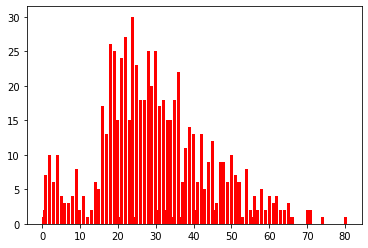

In [8]:
a = titanic["Age"].value_counts().keys().tolist()
b = titanic["Age"].value_counts().tolist()
plt.bar(a, b, color='red')

In [9]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<BarContainer object of 248 artists>

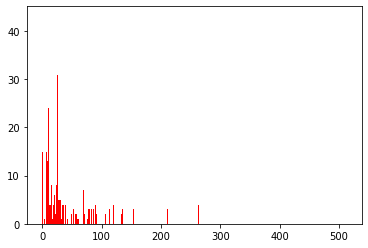

In [10]:
p = titanic["Fare"].value_counts().keys().tolist()
q = titanic["Fare"].value_counts().tolist()
plt.bar(p, q, color='red')

In [11]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


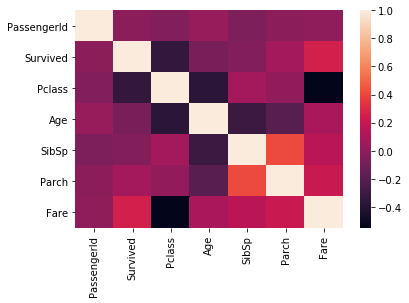

In [12]:
sns.heatmap(corr)

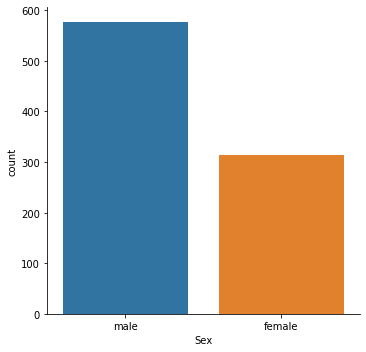

In [13]:
sns.factorplot("Sex", data=titanic, kind="count")

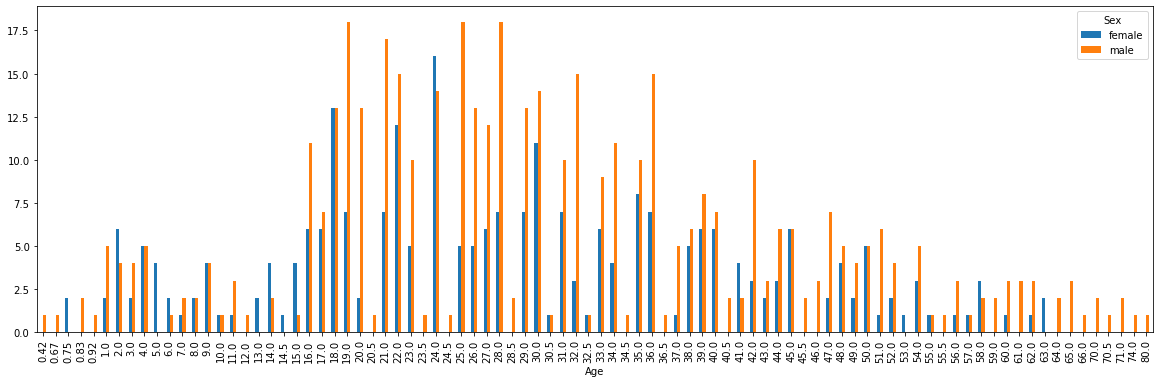

In [14]:
pd.crosstab(titanic.Age,titanic.Sex).plot(kind="bar",figsize=(20,6))
plt.show()

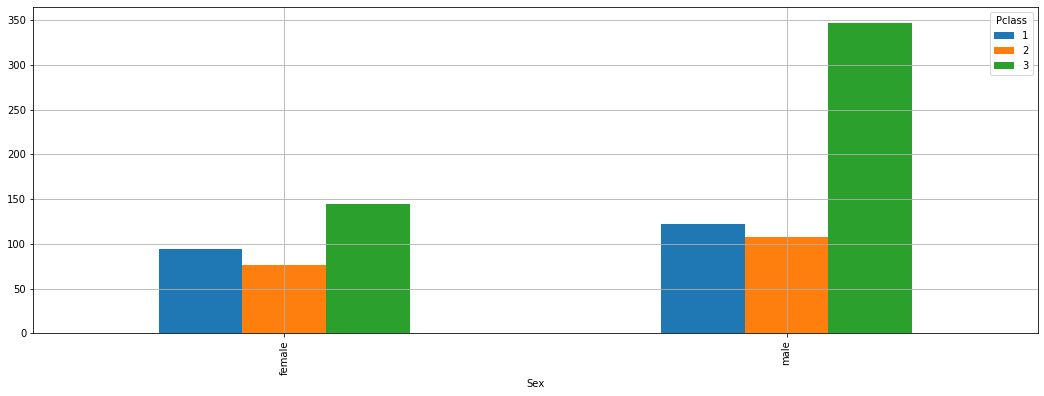

In [15]:
pd.crosstab(titanic.Sex,titanic.Pclass).plot(kind="bar",figsize=(18,6))
plt.grid()
plt.show()

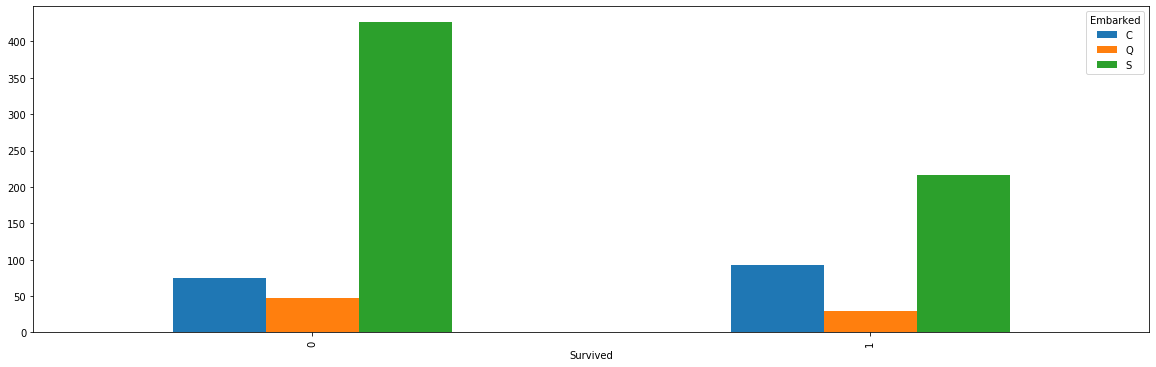

In [16]:
pd.crosstab(titanic.Survived,titanic.Embarked).plot(kind="bar",figsize=(20,6))
plt.show()

In [17]:
titanic["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
titanic["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
titanic["TotalMembers"] = titanic["Parch"] + titanic["SibSp"] + 1
titanic["Title"] = 1

In [20]:
for i in range(891):
    x = titanic["Name"][i].split()
    sr = x[1]
    titanic["Title"][i] = sr

In [21]:
titanic['IsAlone'] = titanic["TotalMembers"].apply(lambda x: 1 if x == 1 else 0)
titanic["IsAlone"].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

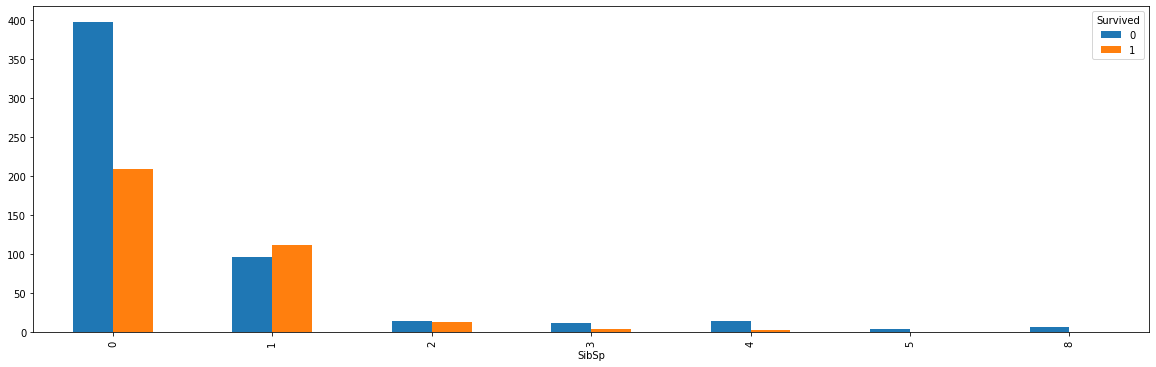

In [22]:
pd.crosstab(titanic.SibSp,titanic.Survived).plot(kind="bar",figsize=(20,6))
plt.show()

In [23]:
def title(d):
    for i in range(891):
        if d == "Mr.":
            return 0
        elif d == "Miss.":
            return 1
        elif d == "Mrs.":
            return 2
        elif d == "Master.":
            return 3
        else:
            return 4

titanic["Title"] = titanic["Title"].apply(title)
titanic["Title"].value_counts()

0    502
1    179
2    121
4     49
3     40
Name: Title, dtype: int64

In [24]:
def Embarked(s):
    for i in range(891):
        if s == "S":
            return 0
        elif s == "C":
            return 1
        else:
            return 2

titanic["Embarked"] = titanic["Embarked"].apply(Embarked)
titanic.Embarked.value_counts()

0    644
1    168
2     79
Name: Embarked, dtype: int64

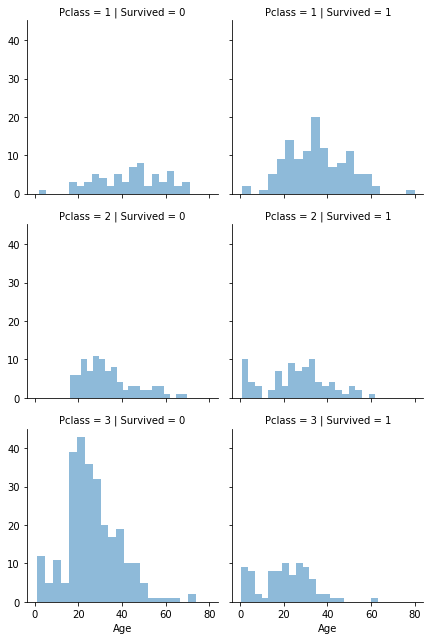

In [25]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [26]:
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 1) &(titanic['Sex'] == 'male'),'Age']=46
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 1) &(titanic['Sex'] == 'female'),'Age']=38
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 2) &(titanic['Sex'] == 'male'),'Age']=28
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 2) &(titanic['Sex'] == 'female'),'Age']=25
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 3) &(titanic['Sex'] == 'male'),'Age']=20
titanic.loc[titanic['Age'].isnull()&(titanic['Pclass'] == 3) &(titanic['Sex'] == 'female'),'Age']=17

def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    not_survived = df_train[df_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,not_survived])
    df.index=['Survived','Not_survived']
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

In [27]:
for i in range(891):
    print(titanic["Title"][i], titanic["Age"][i], titanic["Sex"][i], titanic["Pclass"][i])

0 22.0 male 3
2 38.0 female 1
1 26.0 female 3
2 35.0 female 1
0 35.0 male 3
0 20.0 male 3
0 54.0 male 1
3 2.0 male 3
2 27.0 female 3
2 14.0 female 2
1 4.0 female 3
1 58.0 female 1
0 20.0 male 3
0 39.0 male 3
1 14.0 female 3
2 55.0 female 2
3 2.0 male 3
0 28.0 male 2
4 31.0 female 3
2 17.0 female 3
0 35.0 male 2
0 34.0 male 2
1 15.0 female 3
0 28.0 male 1
1 8.0 female 3
2 38.0 female 3
0 20.0 male 3
0 19.0 male 1
1 17.0 female 3
0 20.0 male 3
4 40.0 male 1
2 38.0 female 1
1 17.0 female 3
0 66.0 male 2
0 28.0 male 1
0 42.0 male 1
0 20.0 male 3
0 21.0 male 3
4 18.0 female 3
1 14.0 female 3
2 40.0 female 3
2 27.0 female 2
0 20.0 male 3
1 3.0 female 2
1 19.0 female 3
0 20.0 male 3
0 20.0 male 3
1 17.0 female 3
0 20.0 male 3
2 18.0 female 3
3 7.0 male 3
0 21.0 male 3
2 49.0 female 1
2 29.0 female 2
0 65.0 male 1
0 46.0 male 1
1 21.0 female 2
0 28.5 male 3
1 5.0 female 2
3 11.0 male 3
0 22.0 male 3
1 38.0 female 1
0 45.0 male 1
3 4.0 male 3
0 46.0 male 1
3 20.0 male 3
2 29.0 female 2
0 19.0 m

1 17.0 female 3
0 49.0 male 1
0 42.0 male 3
2 18.0 female 1
0 35.0 male 1
1 18.0 female 3
0 25.0 male 3
0 26.0 male 3
0 39.0 male 2
2 45.0 female 2
0 42.0 male 1
1 22.0 female 1
3 20.0 male 3
4 24.0 female 1
0 46.0 male 1
0 48.0 male 1
0 29.0 male 3
0 52.0 male 2
0 19.0 male 3
1 38.0 female 1
1 27.0 female 2
0 20.0 male 3
0 33.0 male 3
1 6.0 female 2
0 17.0 male 3
0 34.0 male 2
0 50.0 male 2
0 27.0 male 1
0 20.0 male 3
2 30.0 female 2
1 17.0 female 3
0 25.0 male 2
1 25.0 female 3
1 29.0 female 1
0 11.0 male 3
0 28.0 male 2
0 23.0 male 2
0 23.0 male 2
0 28.5 male 3
2 48.0 female 3
0 35.0 male 1
0 20.0 male 3
0 20.0 male 3
0 46.0 male 1
0 36.0 male 1
1 21.0 female 1
0 24.0 male 3
0 31.0 male 3
4 70.0 male 1
0 16.0 male 3
1 30.0 female 2
0 19.0 male 1
0 31.0 male 3
1 4.0 female 2
3 6.0 male 3
4 33.0 male 3
0 23.0 male 3
2 48.0 female 2
3 0.67 male 2
0 28.0 male 3
0 18.0 male 2
0 34.0 male 3
4 33.0 female 1
0 20.0 male 3
0 41.0 male 3
0 20.0 male 3
2 36.0 female 1
0 16.0 male 3
2 51.0 fema

In [28]:
titanic['Has_Cabin'] = titanic["Cabin"].apply(lambda x: 1 if type(x) == float else 0)
titanic['Has_Cabin'].value_counts()

1    687
0    204
Name: Has_Cabin, dtype: int64

In [29]:
#null_columns=titanic.columns[titanic.isnull().any()]
#print(titanic[titanic.isnull().any(axis=1)][null_columns].head())

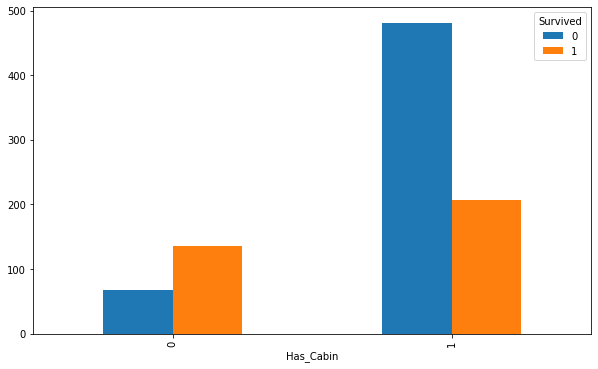

In [30]:
pd.crosstab(titanic.Has_Cabin,titanic.Survived).plot(kind="bar",figsize=(10,6))
plt.show()

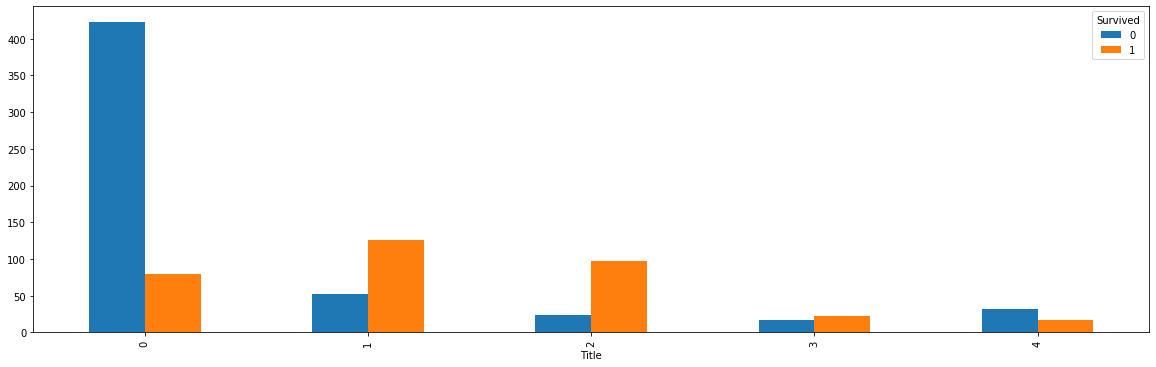

In [31]:
pd.crosstab(titanic.Title,titanic.Survived).plot(kind="bar",figsize=(20,6))
plt.show()

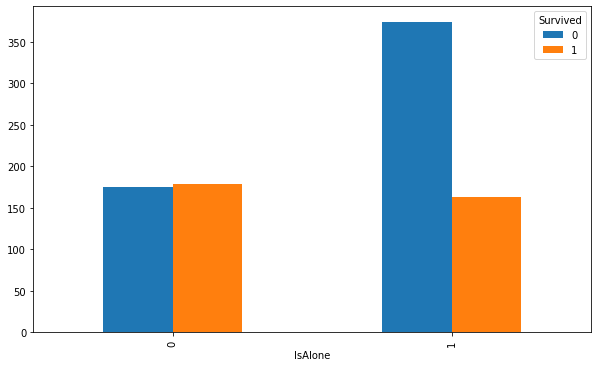

In [32]:
pd.crosstab(titanic.IsAlone,titanic.Survived).plot(kind="bar",figsize=(10,6))
plt.show()

In [33]:
titanic['SEX'] = 1
titanic['SEX'] = titanic["Sex"].apply(lambda x: 1 if x == "male" else 0)
titanic['SEX'].value_counts()

1    577
0    314
Name: SEX, dtype: int64

In [34]:
def age(g):
    for i in range(891):
        if g <= 15:
            return 0
        elif g <=25:
            return 1
        elif g <=45:
            return 2
        else:
            return 3

titanic["Age"] = titanic["Age"].apply(age)
titanic["Age"].value_counts()

1    356
2    328
3    124
0     83
Name: Age, dtype: int64

In [35]:
def fare(h):
    for i in range(891):
        if h <= 10:
            return 0
        elif h <= 50:
            return 1
        elif h <= 100:
            return 2
        elif h <=200:
            return 3
        else:
            return 4

titanic["Fare"] = titanic["Fare"].apply(fare)
titanic["Fare"].value_counts()

1    395
0    336
2    107
3     33
4     20
Name: Fare, dtype: int64

In [36]:
titanic.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [37]:
x = titanic.iloc[:,1:]
y = titanic.iloc[:,0]

In [38]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,TotalMembers,Title,IsAlone,Has_Cabin,SEX
0,3,1,1,0,0,0,2,0,0,1,1
1,1,2,1,0,2,1,2,2,0,0,0
2,3,2,0,0,0,0,1,1,1,1,0
3,1,2,1,0,2,0,2,2,0,0,0
4,3,2,0,0,0,0,1,0,1,1,1


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(757, 11) (134, 11) (757,) (134,)


In [40]:
X = np.array(x_train)
Y = np.array(y_train)

In [42]:
from sklearn import metrics

In [43]:
model1=LogisticRegression()
model1.fit(x_train,y_train)
pred=model1.predict(x_test)
print('Accuracy for  LogisticRegression is ',metrics.accuracy_score(pred,y_test))

Accuracy for  LogisticRegression is  0.7910447761194029


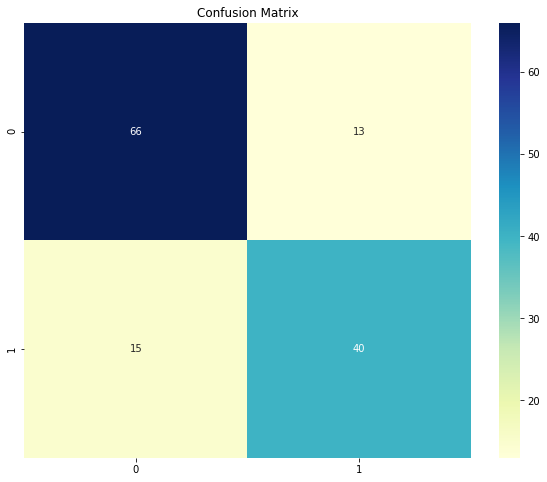

In [44]:
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.svm import SVC

model2=SVC(kernel='rbf',C=1,gamma=0.1)
model2.fit(x_train,y_train)
pred=model2.predict(x_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(pred,y_test))

Accuracy for rbf SVM is  0.8134328358208955


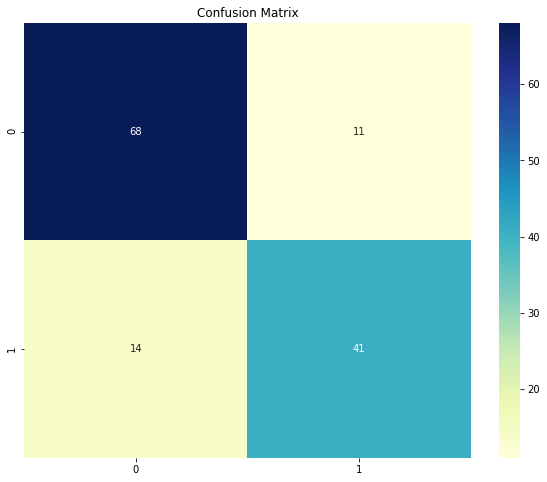

In [48]:
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [50]:
model3=SVC(kernel='linear',C=1,gamma=0.1)
model3.fit(x_train,y_train)
pred=model3.predict(x_test)
print('Accuracy for linear SVM is ',metrics.accuracy_score(pred,y_test))

Accuracy for linear SVM is  0.7686567164179104


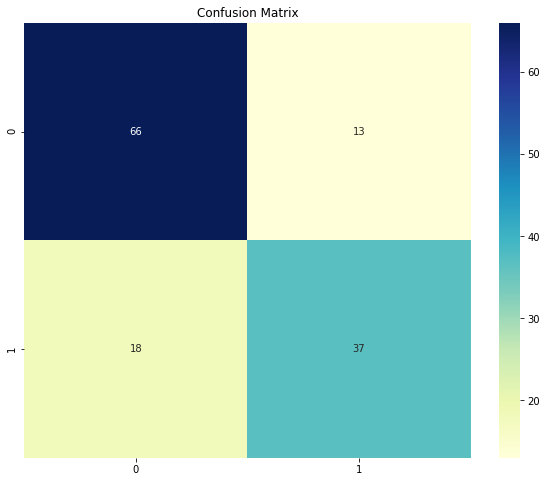

In [51]:
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model4=KNeighborsClassifier(n_neighbors=24)
model4.fit(x_train,y_train)
pred=model4.predict(x_test)
print('Accuracy for KNeighborsClassifier is ',metrics.accuracy_score(pred,y_test))

Accuracy for KNeighborsClassifier is  0.8432835820895522


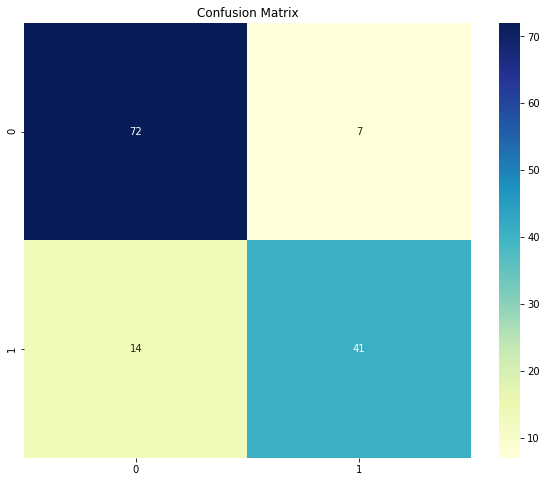

In [54]:
plt.figure(figsize=(10,8))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model5 = RandomForestClassifier(criterion='gini',n_estimators=1750,max_depth=7,min_samples_split=6,min_samples_leaf=6,
                                max_features='auto',oob_score=True,random_state=42,n_jobs=-1)
model5.fit(x_train,y_train)
pred=model5.predict(x_test)
print('Accuracy for RandomForestClassifier is ',metrics.accuracy_score(pred,y_test))

Accuracy for RandomForestClassifier is  0.8134328358208955


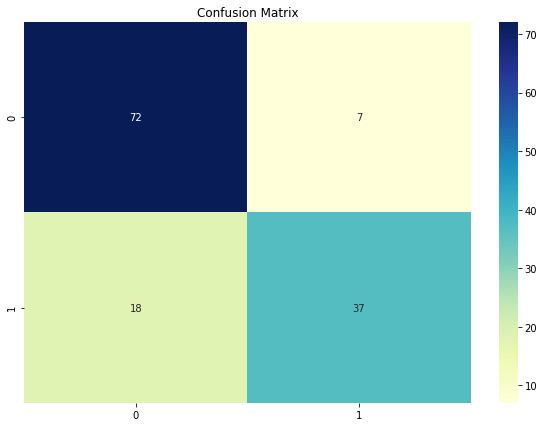

In [58]:
plt.figure(figsize=(10,7))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,pred), annot=True, ax = ax, fmt='g',cmap='YlGnBu') 
ax.set_title('Confusion Matrix')
plt.show()

In [59]:
import pickle
pickle_out = open("classifier_titanic.pkl","wb")
pickle.dump(model4, pickle_out)
pickle_out.close()